Number of symmetries found: 90
Symmetry found at angle: 0°
Symmetry found at angle: 2°
Symmetry found at angle: 4°
Symmetry found at angle: 6°
Symmetry found at angle: 8°
Symmetry found at angle: 10°
Symmetry found at angle: 12°
Symmetry found at angle: 14°
Symmetry found at angle: 16°
Symmetry found at angle: 18°
Symmetry found at angle: 20°
Symmetry found at angle: 22°
Symmetry found at angle: 24°
Symmetry found at angle: 26°
Symmetry found at angle: 28°
Symmetry found at angle: 30°
Symmetry found at angle: 32°
Symmetry found at angle: 34°
Symmetry found at angle: 36°
Symmetry found at angle: 38°
Symmetry found at angle: 40°
Symmetry found at angle: 42°
Symmetry found at angle: 44°
Symmetry found at angle: 46°
Symmetry found at angle: 48°
Symmetry found at angle: 50°
Symmetry found at angle: 52°
Symmetry found at angle: 54°
Symmetry found at angle: 56°
Symmetry found at angle: 58°
Symmetry found at angle: 60°
Symmetry found at angle: 62°
Symmetry found at angle: 64°
Symmetry found at

<ipython-input-2-3852729c26cd>:69: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


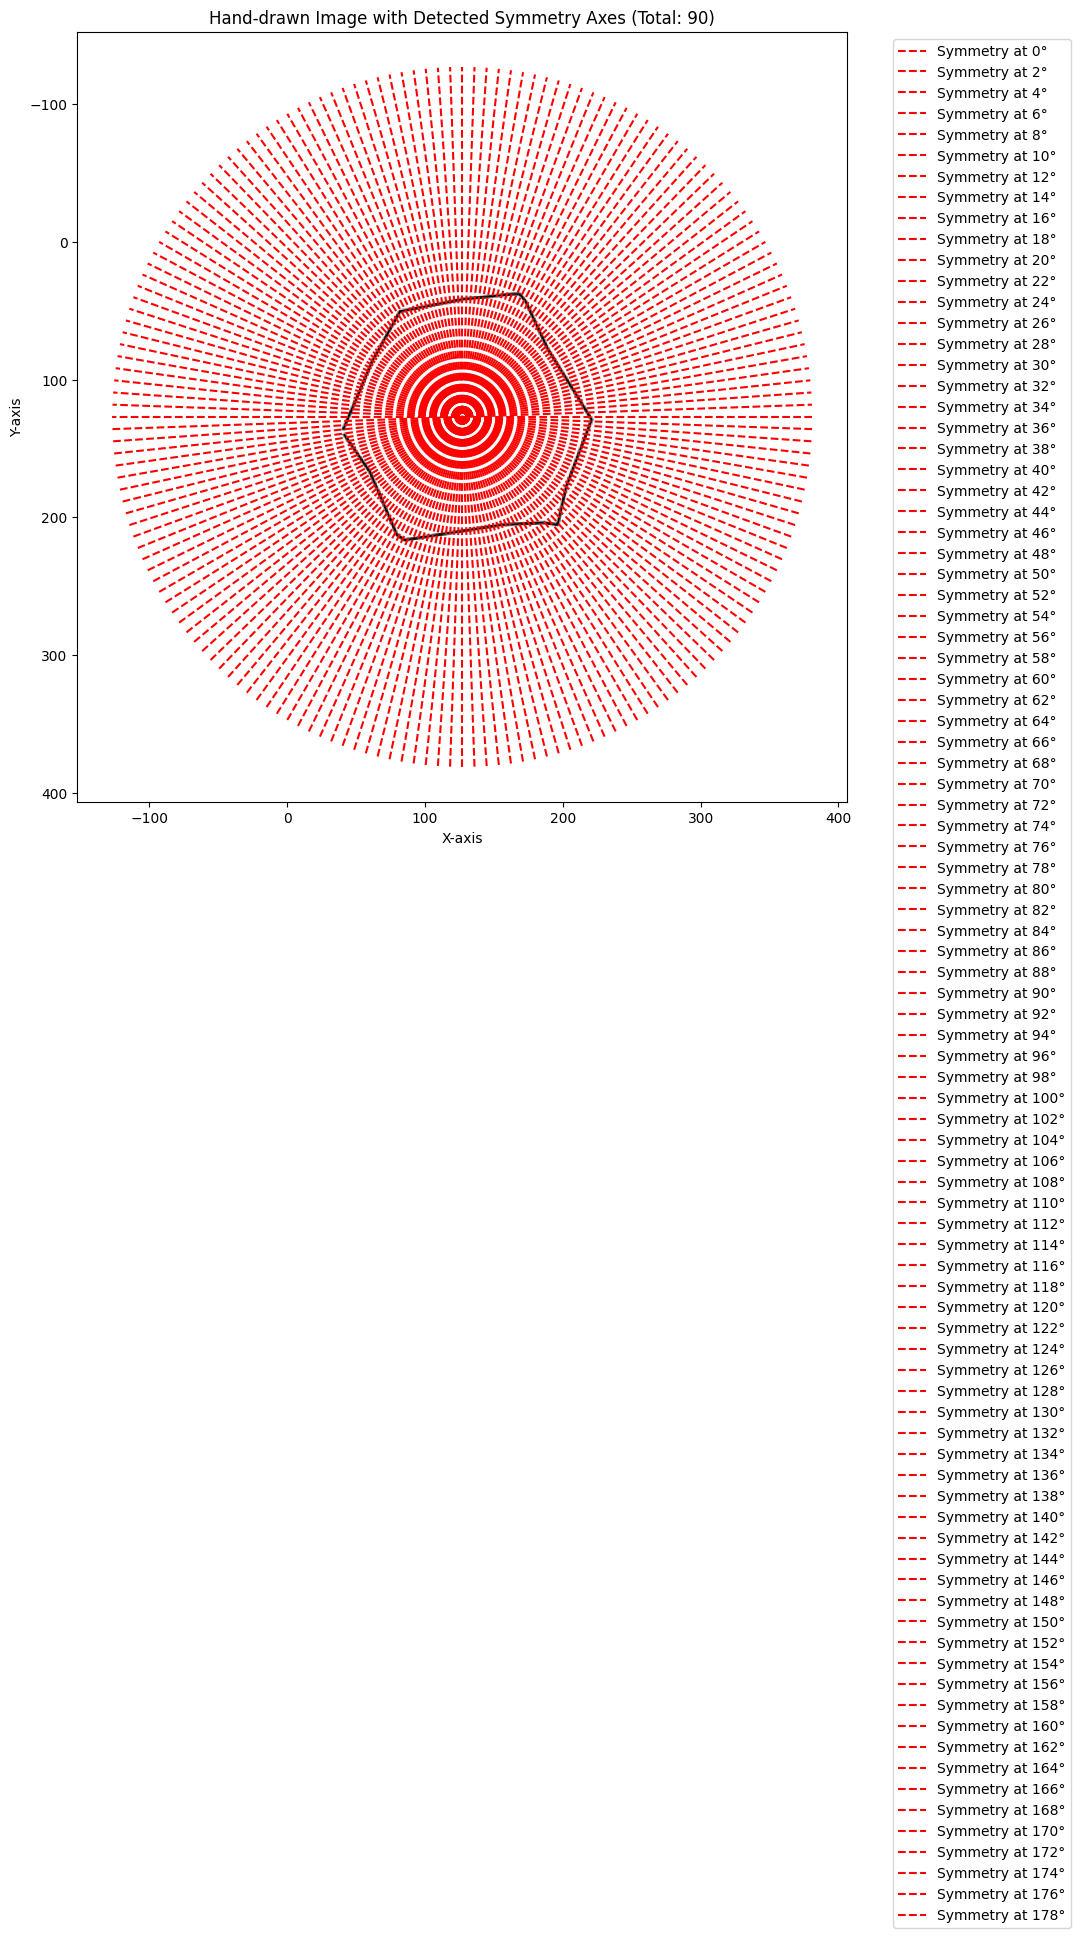

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def preprocess_image(img):
    # Apply Gaussian blur to reduce noise
    blurred = cv2.GaussianBlur(img, (5, 5), 0)
    # Apply adaptive thresholding to handle uneven lighting
    thresh = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)
    return thresh

def check_symmetry(img, angle, threshold=0.8):
    height, width = img.shape
    center = (width // 2, height // 2)

    # Create rotation matrix
    M = cv2.getRotationMatrix2D(center, angle, 1.0)

    # Rotate image
    rotated = cv2.warpAffine(img, M, (width, height), flags=cv2.INTER_NEAREST)

    # Split the rotated image
    left = rotated[:, :width//2]
    right = rotated[:, width//2:]
    right_flipped = cv2.flip(right, 1)

    # Calculate similarity
    diff = cv2.absdiff(left, right_flipped)
    similarity = 1 - (np.sum(diff) / (width * height * 255))

    return similarity > threshold

def find_symmetries(image_path, angle_step=2, threshold=0.95):
    # Read and preprocess the image
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    img = preprocess_image(img)

    symmetries = []
    for angle in range(0, 180, angle_step):
        if check_symmetry(img, angle, threshold):
            symmetries.append(angle)

    return symmetries

def plot_symmetries(image_path, symmetries):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    height, width = img.shape
    center = (width // 2, height // 2)

    plt.figure(figsize=(12, 10))
    plt.imshow(img, cmap='gray')

    for angle in symmetries:
        # Calculate end points of the line
        rho = max(width, height)
        a = np.cos(np.radians(angle))
        b = np.sin(np.radians(angle))
        x0 = a * rho + center[0]
        y0 = b * rho + center[1]
        x1 = -a * rho + center[0]
        y1 = -b * rho + center[1]

        plt.plot([x0, x1], [y0, y1], color='r', linestyle='--', label=f'Symmetry at {angle}°')

    plt.title(f'Hand-drawn Image with Detected Symmetry Axes (Total: {len(symmetries)})')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

# Example usage
image_path = '/content/Hexagon (6).png'
symmetries = find_symmetries(image_path)
print(f"Number of symmetries found: {len(symmetries)}")
for angle in symmetries:
    print(f"Symmetry found at angle: {angle}°")

plot_symmetries(image_path, symmetries)